#  Install package

In [85]:
# ! pip install pyvis
# ! pip install networkx
# ! pip install dash
# ! pip install altair
# ! pip install panel

# Import package

In [86]:
import os
import requests
import networkx as nx
import pandas as pd
import geopandas as gpd
from pyvis.network import Network
import openai
from IPython.display import display, HTML, Code
from IPython.display import clear_output


# Define Solution class
Please run the following cell to define the functions

In [87]:
# %load_ext autoreload
# %autoreload 2

import LLM_Geo_Constants as constants
import helper
# import LLM_Geo_kernel.Solution as Solution

from LLM_Geo_kernel import Solution

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Demonstration Cases

## Input task and data desciption

In [88]:
# Case 1: population living near hazardous wastes

# task_name ='Resident_at_risk_counting'

# TASK = r"""1) Find out the total population that lives within a tract that contain hazardous waste facilities. The study area is North Carolina, US.
# 2) Generate a map to show the spatial distribution of population at the tract level and highlight the borders of tracts that have hazardous waste facilities.
# """

# DATA_LOCATIONS = ["NC hazardous waste facility ESRI shape file location: https://github.com/gladcolor/LLM- Geo/raw/master/overlay_analysis/Hazardous_Waste_Sites.zip.",
#                   "NC tract boundary shapefile location: https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/tract_shp_37.zip. The tract id column is 'Tract'.",
#                   "NC tract population CSV file location: https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/NC_tract_population.csv. The population is stored in 'TotalPopulation' column. The tract ID column is 'GEOID'."
#                  ]


# Case 2: France_mobility_changes_2020
task_name ='France_mobility_changes_2020'
TASK = r'''
1) Show the 2020 human mobility monthly change rates of each administrative regions in a France choropleth map. Each month is a sub-map in a map matrix，12 months in total. The base of the change rate is January 2020. 
2) Draw a line chart to show the monthly change rate trends of all administrative regeions. Each region is a line (the region name is the legend), the x-axis is 2020 months.
'''

DATA_LOCATIONS = ["ESRI shapefile for France administrative regions:" + \
                  "https://github.com/gladcolor/LLM-Geo/raw/master/REST_API/France.zip. " + \
                  "The 'GID_1' column is the administrative region code, 'NAME_1' column is the administrative region name.",
                  "REST API url with parameters for human mobility data access:" + \
                  "http://gis.cas.sc.edu/GeoAnalytics/REST?operation=get_daily_movement_for_all_places&source=twitter&scale=world_first_level_admin&begin=01/01/2020&end=12/31/2020." + \
                  "The response is in CSV format. There are three columns in the response: " + \
                  "place,date (format:2020-01-07), and intra_movement. 'place' column is the administractive region code of every country; codes for France administrative regions start with 'FRA'.",
                 ]

  
# Case 3: COVID-19 prevalence trend
# task_name ='COVID_death_rate'
# TASK = r'''1) Draw a map to show the death rate (death/case) of COVID-19 among the countiguous US counties. Use the accumulated COVID-19 data of 2020.12.31 to compute the death rate. Use scheme ='quantiles' when plotting the map.  Set map projection to 'Conus Albers'. Set map size to 15*10 inches.  
# 2) Draw a scatter plot to show the correlation and trend line of the death rate with the senior resident rate, including the r-square and p-value. Set data point transparency to 50%, regression line as red.  Set figure size to 15*10 inches.  
# '''

# DATA_LOCATIONS = [
#                   r"COVID-19 data case in 2020 (county-level): https://github.com/nytimes/covid-19-data/raw/master/us-counties-2020.csv. This data is for daily accumulated COVID cases and deaths for each county in the US. There are 5 columns: date (format: 2021-02-01), county, state, fips, cases, deaths. ",   
#                   r"Contiguous US county boundary (ESRI shapefile): https://github.com/gladcolor/spatial_data/raw/master/contiguous_counties.zip. The county FIPS column is 'GEOID'. ",
#                   r"Census data (ACS2020): https://raw.githubusercontent.com/gladcolor/spatial_data/master/Demography/ACS2020_5year_county.csv. THe needed columns are: 'FIPS', 'Total Population', 'Total Population: 65 to 74 Years', 'Total Population: 75 to 84 Years', 'Total Population: 85 Years and Over'. Drop rows with NaN cells after loading the used columns.",
#                  ]




# Case 4: Hospital_accessibility
# task_name ='Hospital_accessibility'

# TASK = r'''
# For each zipcode area in South Carolina (SC), calculate the distance from the centroid of the zipcode area to its nearest hospital, and then create a choropleth distance map (unit: km), also show the hospital.
# '''

# # TASK = r'Diplay the  zipcode area in South Carolina (SC) and SC hospital locations in a  map.'

# DATA_LOCATIONS = [
# r"SC zipcode boundary shapefile: https://github.com/GIBDUSC/test/raw/master/sc_zip_boundary.zip, the map projection is WGS1984.",
# r"SC hospitals:  https://github.com/gladcolor/spatial_data/raw/master/South_Carolina/SC_hospitals_with_emergency_room_cleaned.csv, location columns: longitude in 'POINT_X' column, latitude in 'POINT_Y' column.",          
# ]


  
save_dir = os.path.join(os.getcwd(), task_name)
os.makedirs(save_dir, exist_ok=True)

# create graph
# model=r"gpt-3.5-turbo"
model=r"gpt-4"
solution = Solution(
                    task=TASK,
                    task_name=task_name,
                    save_dir=save_dir,
                    data_locations=DATA_LOCATIONS,
                    model=model,
                    )
print("Prompt to get solution graph:\n")
# print(solution.graph_prompt)
print(solution.chat_history)

Prompt to get solution graph:

[{'role': 'system', 'content': 'A professional Geo-information scientist and developer good at Python.'}]


## Get graph code from GPT API

In [89]:
print(solution.chat_history)

[{'role': 'system', 'content': 'A professional Geo-information scientist and developer good at Python.'}]


In [90]:
response_for_graph = solution.get_LLM_response_for_graph() 
# print(solution.chat_history)
solution.graph_response = response_for_graph
solution.save_solution()

clear_output(wait=True)
display(Code(solution.code_for_graph, language='python'))

import networkx as nx

G = nx.DiGraph()

# Data nodes
G.add_node("france_shp_url", node_type="data", data_path="https://github.com/gladcolor/LLM-Geo/raw/master/REST_API/France.zip", description="France administrative regions shapefile URL")
G.add_node("mobility_api_url", node_type="data", data_path="http://gis.cas.sc.edu/GeoAnalytics/REST?operation=get_daily_movement_for_all_places&source=twitter&scale=world_first_level_admin&begin=01/01/2020&end=12/31/2020", description="API URL for global human mobility data")

# Operation nodes
G.add_node("load_france_shp", node_type="operation", description="Load France shapefile")
G.add_node("request_mobility_data", node_type="operation", description="Request human mobility data")
G.add_node("filter_france_data", node_type="operation", description="Filter France administrative regions mobility data")
G.add_node("format_mobility_data", node_type="operation", description="Format mobility data to compute change rates")
G.add_node("compute_change_rates", node_type="operation", description="Compute monthly change rates")
G.add_node("create_choropleth_maps", node_type="operation", description="Create choropleth maps of change rates")
G.add_node("create_line_chart", node_type="operation", description="Create line chart of change rate trends")

# Edges
G.add_edge("france_shp_url", "load_france_shp")
G.add_edge("load_france_shp", "france_gdf")
G.add_edge("mobility_api_url", "request_mobility_data")
G.add_edge("request_mobility_data", "raw_mobility_data")
G.add_edge("raw_mobility_data", "filter_france_data")
G.add_edge("filter_france_data", "france_mobility_data")
G.add_edge("france_mobility_data", "format_mobility_data")
G.add_edge("format_mobility_data", "formatted_mobility_data")
G.add_edge("formatted_mobility_data", "compute_change_rates")
G.add_edge("compute_change_rates", "change_rates_data")
G.add_edge("change_rates_data", "create_choropleth_maps")
G.add_edge("change_rates_data", "create_line_chart")
G.add_edge("france_gdf", "create_choropleth_maps")
G.add_edge("create_choropleth_maps", "choropleth_maps")
G.add_edge("create_line_chart", "line_chart")

# Output data nodes
G.add_node("france_gdf", node_type="data", description="France administrative regions GeoDataFrame")
G.add_node("raw_mobility_data", node_type="data", description="Raw human mobility data")
G.add_node("france_mobility_data", node_type="data", description="France administrative regions mobility data")
G.add_node("formatted_mobility_data", node_type="data", description="Formatted mobility data for computing change rates")
G.add_node("change_rates_data", node_type="data", description="Monthly change rates data")
G.add_node("choropleth_maps", node_type="data", description="Choropleth maps with monthly change rates")
G.add_node("line_chart", node_type="data", description="Line chart with monthly change rate trends")

# Save the graph to GraphML format
nx.write_graphml(G, "E:\\Research\\LLM-Geo\\France_mobility_changes_2020\\France_mobility_changes_2020.graphml")

## Execute code to generate the solution graphto generate the solution graph

In [91]:
exec(solution.code_for_graph)
solution_graph = solution.load_graph_file()

# Show the graph
G = nx.read_graphml(solution.graph_file)  
nt = helper.show_graph(G)
html_name = os.path.join(os.getcwd(), solution.task_name + '.html')  
# HTML file should in the same directory. See:
# https://stackoverflow.com/questions/65564916/error-displaying-pyvis-html-inside-jupyter-lab-cell
nt.show(name=html_name)
# html_name

E:\Research\LLM-Geo\France_mobility_changes_2020.html


## Generate prompts and code for operations (functions)

In [92]:
operations = solution.get_LLM_responses_for_operations()
solution.save_solution()

all_operation_code_str = '\n'.join([operation['operation_code'] for operation in operations])

clear_output(wait=True)
display(Code(all_operation_code_str, language='python'))

import geopandas as gpd

def load_france_shp(france_shp_url='https://github.com/gladcolor/LLM-Geo/raw/master/REST_API/France.zip'):
    # Description: Load France shapefile
    # france_shp_url: France administrative regions shapefile URL
    france_gdf = gpd.read_file(france_shp_url)
    return france_gdf
import requests
import pandas as pd
from io import StringIO


def request_mobility_data(mobility_api_url='http://gis.cas.sc.edu/GeoAnalytics/REST?operation=get_daily_movement_for_all_places&source=twitter&scale=world_first_level_admin&begin=01/01/2020&end=12/31/2020'):
    # Description: Request human mobility data
    # mobility_api_url: API URL for global human mobility data
    response = requests.get(mobility_api_url)
    raw_mobility_data = pd.read_csv(StringIO(response.text))
    return raw_mobility_data
def filter_france_data(raw_mobility_data):
    # Description: Filter France administrative regions mobility data
    # raw_mobility_data: Raw human mobility data
    france_mobility_data = raw_mobility_data[raw_mobility_data['place'].str.startswith('FRA')]
    return france_mobility_data
import pandas as pd

def format_mobility_data(france_mobility_data):
    # Description: Format mobility data to compute change rates
    # france_mobility_data: France administrative regions mobility data
    france_mobility_data['date'] = pd.to_datetime(france_mobility_data['date'], format="%Y-%m-%d")
    france_mobility_data['month'] = france_mobility_data['date'].dt.month
    france_mobility_data['year'] = france_mobility_data['date'].dt.year
    france_mobility_data = france_mobility_data[france_mobility_data['year'] == 2020]
    france_mobility_data = france_mobility_data.groupby(['place', 'month']).agg({'intra_movement': 'mean'}).reset_index()
    base_month = france_mobility_data[france_mobility_data['month'] == 1]
    base_month = base_month[['place', 'intra_movement']].rename(columns={'intra_movement': 'base_intra_movement'})
    formatted_mobility_data = pd.merge(france_mobility_data, base_month, on='place')
    return formatted_mobility_data
def compute_change_rates(formatted_mobility_data):
    # Description: Compute monthly change rates
    # formatted_mobility_data: Formatted mobility data for computing change rates
    change_rates_data = formatted_mobility_data.copy()
    change_rates_data['change_rate'] = (change_rates_data['intra_movement'] - change_rates_data['base_intra_movement']) / change_rates_data['base_intra_movement']
    return change_rates_data
import geopandas as gpd
import matplotlib.pyplot as plt

def create_choropleth_maps(france_gdf, change_rates_data):
    # Description: Create choropleth maps of change rates
    # france_gdf: France administrative regions GeoDataFrame
    # change_rates_data: Monthly change rates data
    
    # Merge change_rates_data with france_gdf
    change_rates_gdf = france_gdf.merge(change_rates_data, left_on='GID_1', right_on='place')
    
    # Create subplots for the 12 months
    fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 20), tight_layout=True)
    
    months = change_rates_gdf["month"].unique()
    months.sort()
    
    for idx, month in enumerate(months):
        ax = axs[idx // 3][idx % 3]
        
        # Filter data for the current month
        month_data = change_rates_gdf[change_rates_gdf["month"] == month]
        
        # Plot choropleth map for the current month
        month_data.plot(column='change_rate', cmap="coolwarm", legend=True, ax=ax)
        
        # Set title and remove axis labels
        ax.set_title(f'Month {month}')
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Add region names
        for idx, region_row in month_data.iterrows():
            region_name = region_row["NAME_1"]
            region_coords = region_row["geometry"].representative_point().coords[:][0]
            ax.annotate(region_name, xy=region_coords, horizontalalignment='center', fontsize=8)
    
    # Return choropleth_maps
    return 

## Generate prompts and code for assembly program

In [93]:
assembly_LLM_response = solution.get_LLM_assembly_response()
solution.assembly_LLM_response = assembly_LLM_response
solution.save_solution()

clear_output(wait=True)
display(Code(solution.code_for_assembly, language='python'))

def assembly_solution():
    # Step 1: Load France shapefile
    france_gdf = load_france_shp()

    # Step 2: Request human mobility data
    raw_mobility_data = request_mobility_data()

    # Step 3: Filter France administrative regions mobility data
    france_mobility_data = filter_france_data(raw_mobility_data)

    # Step 4: Format mobility data to compute change rates
    formatted_mobility_data = format_mobility_data(france_mobility_data)

    # Step 5: Compute monthly change rates
    change_rates_data = compute_change_rates(formatted_mobility_data)

    # Step 6: Create choropleth maps of change rates
    choropleth_maps = create_choropleth_maps(france_gdf, change_rates_data)
    choropleth_maps.savefig("choropleth_maps.png")

    # Step 7: Create line chart of change rate trends
    line_chart = create_line_chart(change_rates_data)
    line_chart.savefig("line_chart.png")

assembly_solution()

## Execute assembly code

import geopandas as gpd

def load_france_shp(france_shp_url='https://github.com/gladcolor/LLM-Geo/raw/master/REST_API/France.zip'):
    # Description: Load France shapefile
    # france_shp_url: France administrative regions shapefile URL
    france_gdf = gpd.read_file(france_shp_url)
    return france_gdf
import requests
import pandas as pd
from io import StringIO


def request_mobility_data(mobility_api_url='http://gis.cas.sc.edu/GeoAnalytics/REST?operation=get_daily_movement_for_all_places&source=twitter&scale=world_first_level_admin&begin=01/01/2020&end=12/31/2020'):
    # Description: Request human mobility data
    # mobility_api_url: API URL for global human mobility data
    response = requests.get(mobility_api_url)
    raw_mobility_data = pd.read_csv(StringIO(response.text))
    return raw_mobility_data
def filter_france_data(raw_mobility_data):
    # Description: Filter France administrative regions mobility data
    # raw_mobility_data: Raw human mobility data
    france_mobility_data = raw_mobility_data[raw_mobility_data['place'].str.startswith('FRA')]
    return france_mobility_data
import pandas as pd

def format_mobility_data(france_mobility_data):
    # Description: Format mobility data to compute change rates
    # france_mobility_data: France administrative regions mobility data
    france_mobility_data['date'] = pd.to_datetime(france_mobility_data['date'], format="%Y-%m-%d")
    france_mobility_data['month'] = france_mobility_data['date'].dt.month
    france_mobility_data['year'] = france_mobility_data['date'].dt.year
    france_mobility_data = france_mobility_data[france_mobility_data['year'] == 2020]
    france_mobility_data = france_mobility_data.groupby(['place', 'month']).agg({'intra_movement': 'mean'}).reset_index()
    base_month = france_mobility_data[france_mobility_data['month'] == 1]
    base_month = base_month[['place', 'intra_movement']].rename(columns={'intra_movement': 'base_intra_movement'})
    formatted_mobility_data = pd.merge(france_mobility_data, base_month, on='place')
    return formatted_mobility_data
def compute_change_rates(formatted_mobility_data):
    # Description: Compute monthly change rates
    # formatted_mobility_data: Formatted mobility data for computing change rates
    change_rates_data = formatted_mobility_data.copy()
    change_rates_data['change_rate'] = (change_rates_data['intra_movement'] - change_rates_data['base_intra_movement']) / change_rates_data['base_intra_movement']
    return change_rates_data
import geopandas as gpd
import matplotlib.pyplot as plt

def create_choropleth_maps(france_gdf, change_rates_data):
    # Description: Create choropleth maps of change rates
    # france_gdf: France administrative regions GeoDataFrame
    # change_rates_data: Monthly change rates data
    
    # Merge change_rates_data with france_gdf
    change_rates_gdf = france_gdf.merge(change_rates_data, left_on='GID_1', right_on='place')
    
    # Create subplots for the 12 months
    fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 20), tight_layout=True)
    
    months = change_rates_gdf["month"].unique()
    months.sort()
    
    for idx, month in enumerate(months):
        ax = axs[idx // 3][idx % 3]
        
        # Filter data for the current month
        month_data = change_rates_gdf[change_rates_gdf["month"] == month]
        
        # Plot choropleth map for the current month
        month_data.plot(column='change_rate', cmap="coolwarm", legend=True, ax=ax)
        
        # Set title and remove axis labels
        ax.set_title(f'Month {month}')
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Add region names
        for idx, region_row in month_data.iterrows():
            region_name = region_row["NAME_1"]
            region_coords = region_row["geometry"].representative_point().coords[:][0]
            ax.annotate(region_name, xy=region_coords, horizontalalignment='center', fontsize=8)
    
    # Return choropleth_maps
    return 



-------------- Running code (trial # 1/10) --------------




<string>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:90: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same 

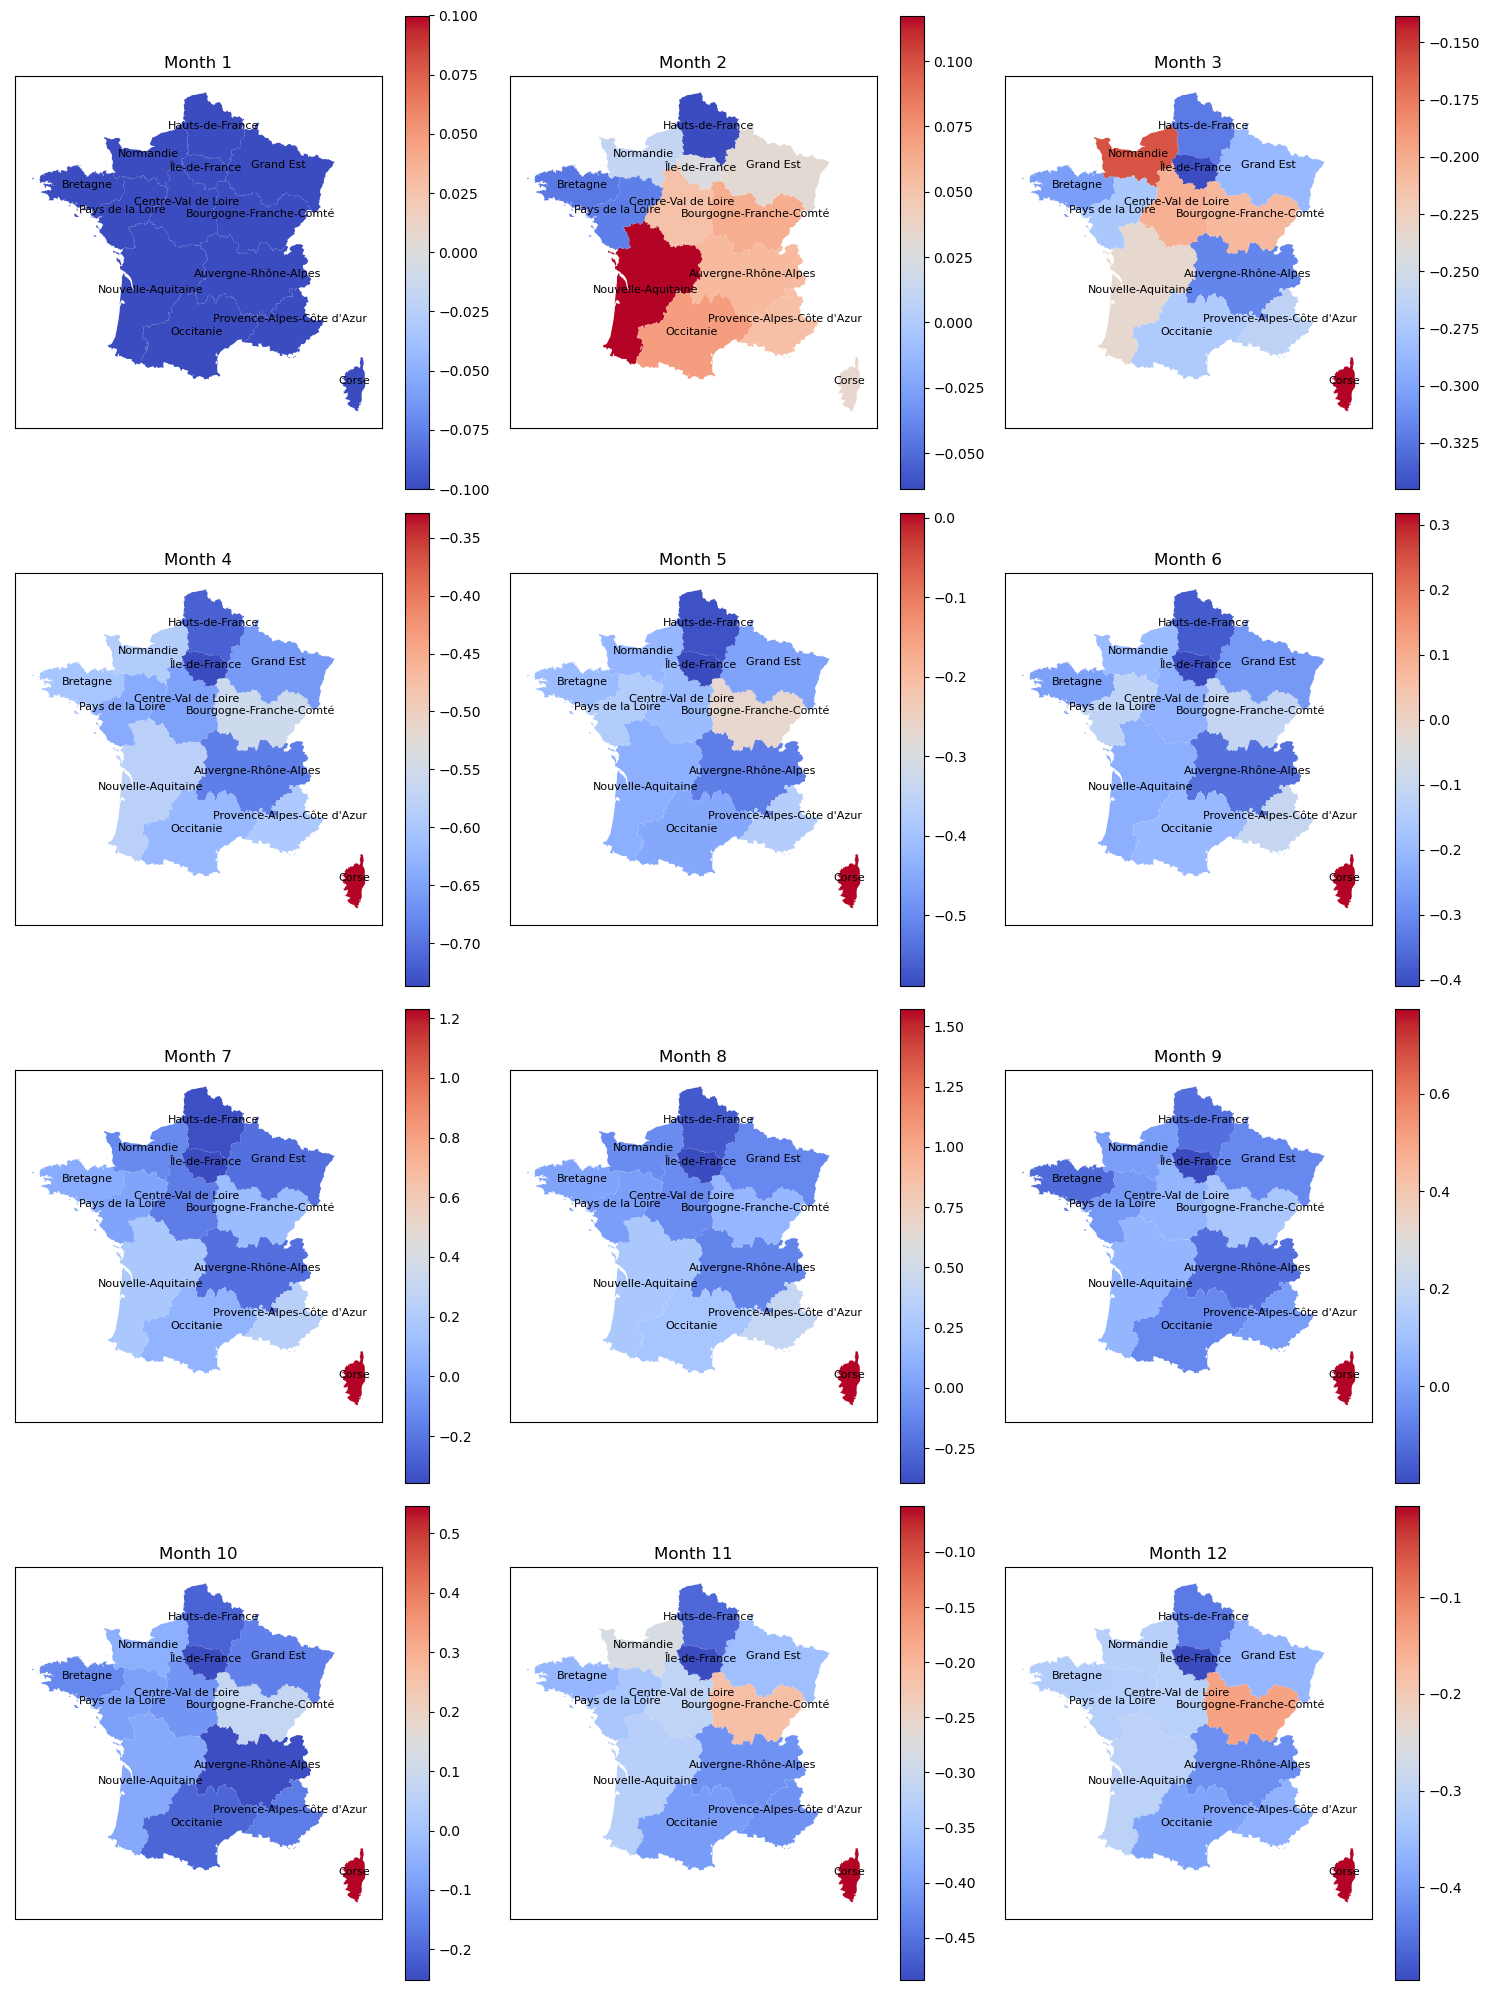

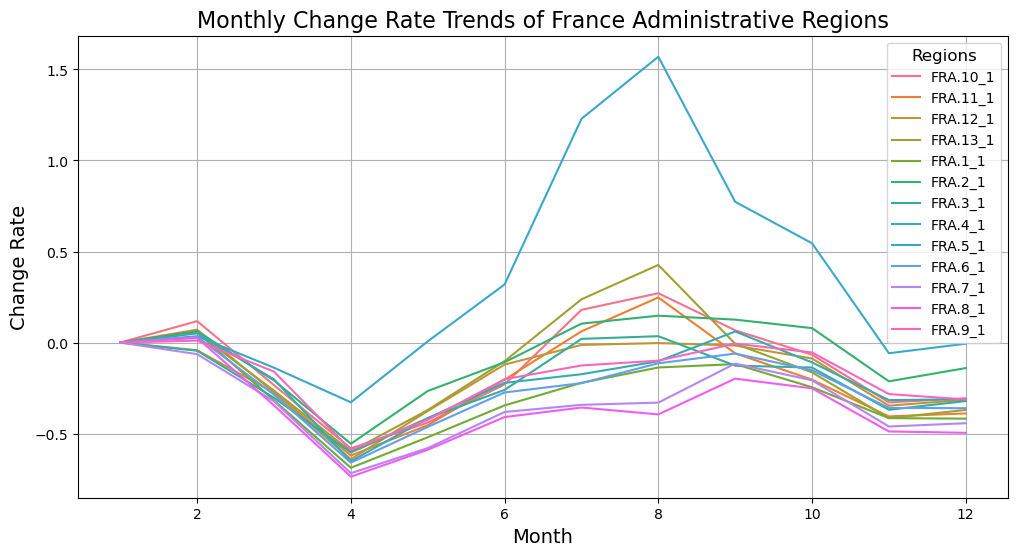



--------------- Done ---------------




In [94]:
all_code = all_operation_code_str + '\n' + solution.code_for_assembly

# print(solution.code_for_assembly)
display(Code(all_code, language='python'))
# display(Code(all_code, language='python'))
# clear_output(wait=True)
# exec(all_code)
all_code = solution.execute_complete_program(code=all_code, try_cnt=10)
# solution.direct_request_code = code


In [95]:
# solution.operations[-1].keys()
# print(solution.operations[-2]['operation_prompt'])